In [11]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt 
import matplotlib.dates as mdates

In [54]:
df = pd.read_csv('covid.results.deterministic.csv',sep='\t')
dfD = pd.read_csv('covid_19_manual.csv')

# fix date format
df['time'] = pd.to_datetime(df['time'])
df = df.rename(columns= {'time':'Date'})
dfD['Date'] = pd.to_datetime(dfD['Date'])

In [61]:
cum_infected = np.zeros(len(df['infectious']))
infectious = df['infectious']
dead = df['dead']
recovered = df['recovered']

cum_infected[0] = infectious[0]
cum_infected[1] = infectious[1]
cum_i = cum_infected[1]

for i in range(2,len(cum_infected)):
    delta_infect = infectious[i] - infectious[i-1]
    delta_recovered = recovered[i-1] - recovered[i-2]
    delta_dead = dead[i-1] - dead[i-2]
    new_infect =  delta_infect + delta_recovered + delta_dead
    cum_i = cum_i + new_infect
    cum_infected[i] = cum_i

# add column to dataframe
df['cuminfected'] = cum_infected

In [62]:
# choose country data
dfCountry = dfD[dfD['Country/Region'] == 'Germany'].drop(['Province/State', 'Country/Region'], axis=1).reset_index()

# merge
df_merge = pd.merge(dfCountry, df, how='outer', on='Date').reset_index()

In [72]:
df_merge.head(5)

,index,Date,Confirmed,Deaths,Recovered,susceptible,exposed,infectious,hospitalized,critical,overflow,discharged,intensive,recovered,dead,cuminfected
0,11.0,2020-01-22,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,302.0,2020-01-23,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,593.0,2020-01-24,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,884.0,2020-01-25,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1175.0,2020-01-26,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


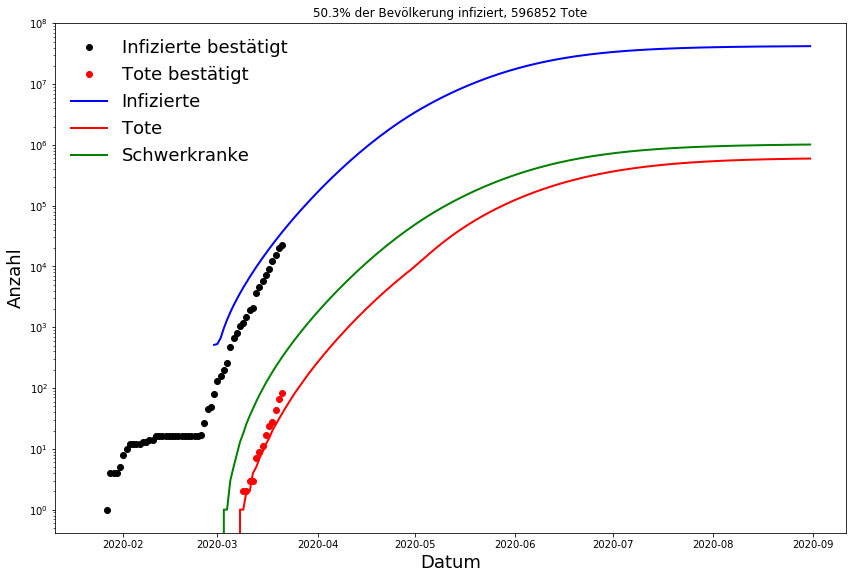

In [125]:
fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))
ax.set_yscale('log')

ax.plot(df_merge['Date'], df_merge['Confirmed'], 'ko', label = 'Infizierte bestätigt')
ax.plot(df_merge['Date'], df_merge['Deaths'], 'ro', label = 'Tote bestätigt')

ax.plot(df_merge['Date'], df_merge['cuminfected'], color = 'b',label = 'Infizierte',linewidth=2)
ax.plot(df_merge['Date'], df_merge['dead'], color = 'r', label = 'Tote',linewidth=2)
ax.plot(df_merge['Date'], df_merge['intensive'], color = 'g', label = 'Schwerkranke',linewidth=2)

ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()
percent_infected = 100*df_merge['cuminfected'].max()/df_merge['susceptible'].max()
dead = df_merge['dead'].max()
ax.set_title(f'{percent_infected:.3g}% der Bevölkerung infiziert, {dead:.0f} Tote');

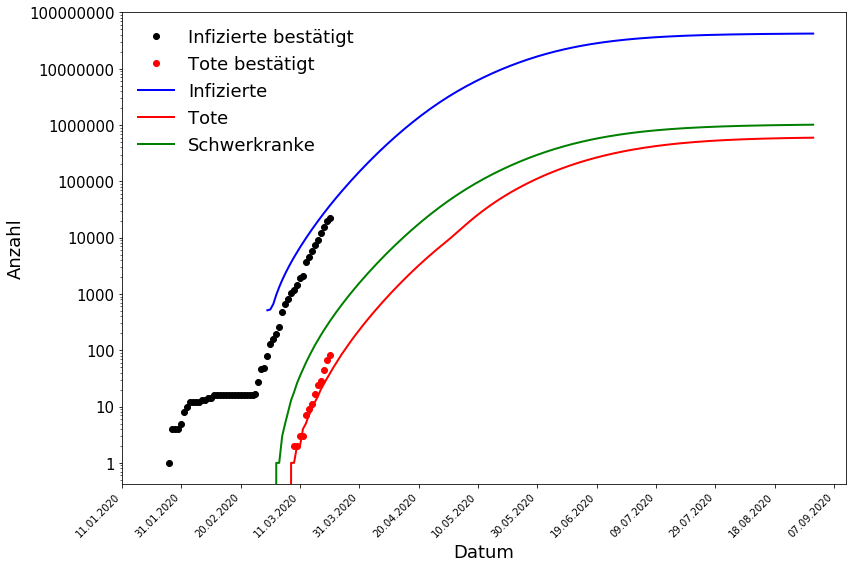

In [102]:
fig, ax =  plt.subplots(1,1, figsize=(12.0,8.0))
ax.set_yscale('log')

ax.plot(df_merge['Date'], df_merge['Confirmed'], 'ko', label = 'Infizierte bestätigt')
ax.plot(df_merge['Date'], df_merge['Deaths'], 'ro', label = 'Tote bestätigt')

ax.plot(df_merge['Date'], df_merge['cuminfected'], color = 'b',label = 'Infizierte',linewidth=2)
ax.plot(df_merge['Date'], df_merge['dead'], color = 'r', label = 'Tote',linewidth=2)
ax.plot(df_merge['Date'], df_merge['intensive'], color = 'g', label = 'Schwerkranke',linewidth=2)


# das folgende checke ich nicht, ist aber evtl auch nicht nötig?
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d.%m.%Y'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.gcf().autofmt_xdate()

ax.set_xticks(ax.get_xticks()[::20])
ax.tick_params(axis='x', rotation=45)

ax.set_yticklabels([int(x) for x in ax.get_yticks()],fontsize=15)

ax.set_xlabel('Datum',fontsize=18)
ax.set_ylabel('Anzahl',fontsize=18)

ax.legend(loc='best',fontsize=18.0,numpoints=1, frameon=False)

fig.tight_layout()

#plt.savefig('Deutschland_Model_Bestätigt.png',dpi=300)